<a href="https://colab.research.google.com/github/YasminForestti/Processo-seletivo-Analytica-2022/blob/main/analise_homicidio_por_ano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1)** Importação das bibliotecas e bases de dados

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
brasil = pd.read_csv("/brasil.csv")
homicidios= np.array(brasil['homicidios'])
data = {
    'Homicidio': homicidios
}
data
df_brasil = pd.DataFrame(data, index= brasil['ano'])


In [67]:
data = {
    'Homicidio': homicidios
}
data
df_brasil = pd.DataFrame(data, index= brasil['ano'])

In [21]:
colors=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]

##**2)** Número de homicídio por ano 

In [10]:
Media_homicidio_ano = sum(brasil['homicidios'])/len(brasil)
Media_homicidio_vetor = [Media_homicidio_ano]*20

Text(0.5, 1.0, 'Número de homicídios por ano')

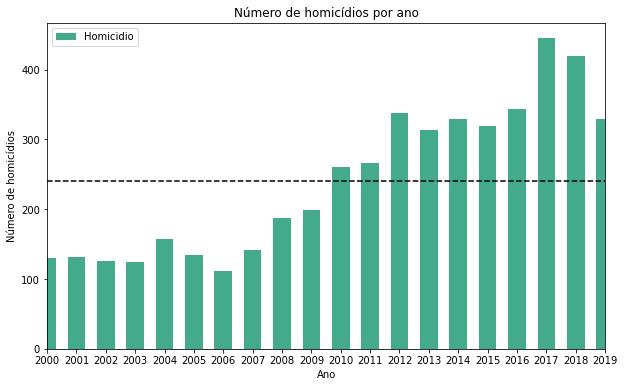

In [62]:
df_brasil.plot(kind = 'bar', color= "#43aa8b", width = 0.6, figsize = (10,6), )
plt.plot(Media_homicidio_vetor, '--' ,color = 'Black')
plt.xticks(rotation=0)
plt.xlim([0, 19]) 
plt.xlabel('Ano')
plt.ylabel('Número de homicídios')
plt.title("Número de homicídios por ano")

##**3)** Análise das médias de  homicídios por governo

In [65]:
homicidios = brasil['homicidios']
Primeiro_Gov_Lula = sum(homicidios[x] for x in range(3,7))/4
Segundo_Gov_Lula = sum(homicidios[x] for x in range(7,11))/4
Primeiro_Gov_Dilma = sum(homicidios[x] for x in range(11,15))/4
Segundo_Gov_Dilma = sum(homicidios[x] for x in range(15,17))/2
Governo_provisorio = homicidios[17]
Metade_Governo_Bolsonaro = sum(homicidios[x] for x in range(18,20))/2
Media_homicidio_goveno = [Primeiro_Gov_Lula,Segundo_Gov_Lula, Primeiro_Gov_Dilma,Segundo_Gov_Dilma, Governo_provisorio,Metade_Governo_Bolsonaro]


In [66]:
Variação_homicidios_Gov_anterior = [0]*6
for i in range(0,6):
  if i == 0: 
    Variação_homicidios_Gov_anterior[i] = '-'
  else:  
    Variação_homicidios_Gov_anterior[i] = ((Media_homicidio_goveno[i] - Media_homicidio_goveno[i-1])/Media_homicidio_goveno[i-1])

In [63]:
data = {
    'Media de homicídios' : Media_homicidio_goveno,
    'Variação percentual da média de homicidios': Variação_homicidios_Gov_anterior
}
df_Media_homicidio = pd.DataFrame(data, index=['2003-2006','2007-20010','2011-2014','2014-2016','2017','2018-2019'])
print(df_Media_homicidio)

            Media de homicídios Variação percentual da média de homicidios
2003-2006                132.50                                          -
2007-20010               197.00                                   0.486792
2011-2014                311.75                                   0.582487
2014-2016                331.00                                   0.061748
2017                     445.00                                   0.344411
2018-2019                374.50                                  -0.158427


Text(0.5, 1.0, 'Média de homicídios por Governo')

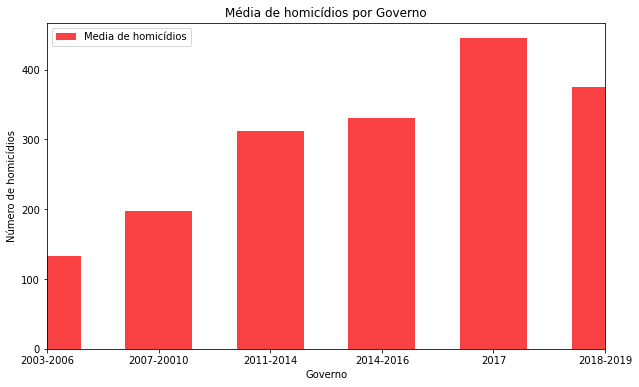

In [46]:
df_Media_homicidio.plot(kind = 'bar', color= colors, width = 0.6, figsize = (10,6), )
plt.xticks(rotation=0)
plt.xlim([0, 5]) 
plt.xlabel('Governo')
plt.ylabel('Número de homicídios')
plt.title("Média de homicídios por Governo")

In [64]:
desvio_padrao_gov = np.std(Media_homicidio_goveno)
Coeficiente_variação_gov = (desvio_padrao_gov*100)/Media_homicidio_ano
print(Coeficiente_variação_gov)

43.7269071793057
